# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission, if necessary. Sections that begin with **'Implementation'** in the header indicate where you should begin your implementation for your project. Note that some sections of implementation are optional, and will be marked with **'Optional'** in the header.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [4]:
# Load pickled data
import pickle

# TODO: Fill this in based on where you saved the training and testing data

training_file = 'train.p'
testing_file = 'test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_test, y_test = test['features'], test['labels']

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 2D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below.

In [5]:
### Replace each question mark with the appropriate value.

# TODO: Number of training examples
n_train = X_train.shape[0]

# TODO: Number of testing examples.
n_test = X_test.shape[0]

# TODO: What's the shape of an traffic sign image?
image_shape =  X_train[0].shape

# TODO: How many unique classes/labels there are in the dataset.
n_classes = len(set(y_train))

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 39209
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc.

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections.

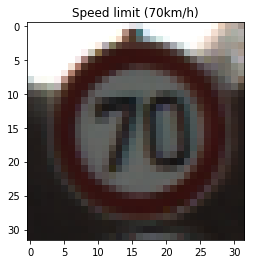

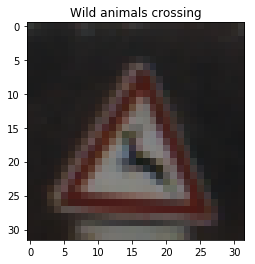

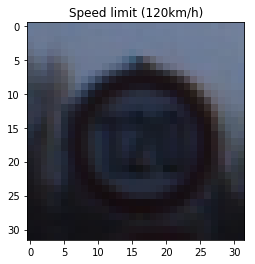

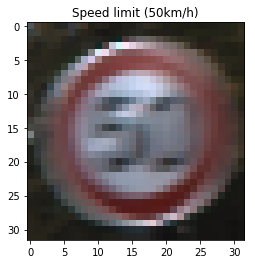

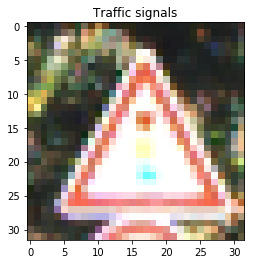

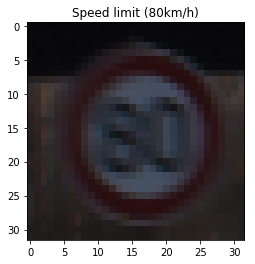

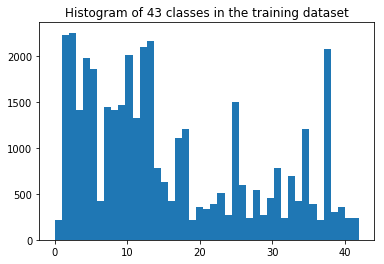

In [6]:
### Data exploration visualization goes here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
import numpy as np
# Visualizations will be shown in the notebook.
%matplotlib inline

def load_label_file(file):
    lines = open(file).readlines()[1:]
    lines = [line.strip().split(",") for line in lines]
    label_descs = dict([ (int(classid), desc) for classid, desc in lines])
    return label_descs

label_descriptions = load_label_file("signnames.csv")

#select samples from training data
#We will randomly select 6 figures from the train set to plot them with their labels. 
n_samples = 6
isample = np.random.randint(0, n_train, n_samples)
sample_imgs = X_train[isample]
sample_labels = list(map(label_descriptions.get, y_train[isample]))


for img, label in zip(sample_imgs, sample_labels):
    plt.imshow(img)
    plt.title(label)
    plt.show()
    

# plot the histogram of the labels. There are total 43 bars, since there are total 43 classes.  
plt.hist(y_train, bins=43)
plt.title("Histogram of 43 classes in the training dataset")



----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

There are various aspects to consider when thinking about this problem:

- Neural network architecture
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

**NOTE:** The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play!

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

In [7]:
### Preprocess the data here.
### Feel free to use as many code cells as needed.

# we first shuffle the data
from sklearn.utils import shuffle
X_train, y_train = shuffle(X_train, y_train)

import cv2
# Turn image to greyscale function
def RGB_2_GRAY(image_array):
    return cv2.cvtColor(image_array, cv2.COLOR_RGB2GRAY)

# Normalization function
def normalize_grayscale(image_data):
    """
    Normalize the image data with Min-Max scaling to a range of [0.1, 0.9]
    :param image_data: The image data to be normalized
    :return: Normalized image data
    """
    a = 0.1
    b = 0.9
    greyscale_min = 0
    greyscale_max = 255.
    return a + (image_data - greyscale_min)*(b - a)/( greyscale_max - greyscale_min ) 

def preprocess(data):
    gray_images = []
    for image in data:
        gray = RGB_2_GRAY(image)
        gray_images.append(gray)
        
    return np.array(gray_images)

In [8]:
from numpy import newaxis

print('Preprocessing training data...')

# Iterate through grayscale
X_train_gray = preprocess(X_train)
X_train_gray = X_train_gray[..., newaxis]

X_test_gray = preprocess(X_test)
X_test_gray = X_test_gray[..., newaxis]

# Normalization
X_train_pro = normalize_grayscale(X_train_gray)
X_test_pro = normalize_grayscale(X_test_gray)

#print the shape of the new image
print("Training set Image data shape =", X_train_gray.shape)
print("Testing set Image data shape =", X_test_gray.shape)

print('All figures are in normalized gray-scale.')



Preprocessing training data...
Training set Image data shape = (39209, 32, 32, 1)
Testing set Image data shape = (12630, 32, 32, 1)
All figures are in normalized gray-scale.


### Question 1 

_Describe how you preprocessed the data. Why did you choose that technique?_

**Answer:**
1. Converted to grey-scale  
All the original figures are in RGB format, which has 3 channels of the colors. I check the figures in the dataset,  there wasn't going to be a whole lot of additional information gained from rgb versus grayscale. Also since there are all traffic signs, shapes are more important than the colors. Therefore, I choose to convert all the RGB figures to the gray-scale figures. 

2. Data Normalization  
Then I normalized the gray-scale data between .1 and .9, similar to what was discussed in one of the TensorFlow lectures. This will prevent the overfitting. The value between .1 and .9 also avoids any potential problems incurred by allowing the data to be zero.

3. Generate new figures from the data set, and change each class has at least 1000 exampels.  
This will be shown in the next cell and discuss in the next qustions. 

In [9]:
### Generate data additional data (OPTIONAL!)
### and split the data into training/validation/testing sets here.
### Feel free to use as many code cells as needed.
'''
pics_in_class = np.bincount(y_train)
median_pics = int(np.median(pics_in_class))
lower_bound = median_pics
'''

from scipy import ndimage
import random

imag_class = np.bincount(y_train)
lower_bound = 1000


# Iterate through each class
for i in range(len(imag_class)):
    
    # Check if less data than the mean
    if imag_class[i] < lower_bound:
        
        # Count how many additional pictures we want
        num_new = lower_bound - imag_class[i]
        picture = np.where(y_train == i)
        more_X = []
        more_y = []
        
        # Make the number of additional pictures needed to arrive at the mean
        for num in range(num_new):
            
            # Rotate images and append new ones to more_X, append the class to more_y
            more_X.append(ndimage.rotate(X_train_pro[picture][random.randint(0,imag_class[i] - 1)],\
                                         random.uniform(-15,15), reshape=False))
            more_y.append(i)
        
        # Append the pictures generated for each class back to the original data
        X_train_pro = np.append(X_train_pro, np.array(more_X), axis=0)
        y_train = np.append(y_train, np.array(more_y), axis=0)
        
print('Additional data generated. Any classes lacking data now have', lower_bound, 'pictures.')
print("Number of training examples =", X_train_pro.shape)


Additional data generated. Any classes lacking data now have 1000 pictures.
Number of training examples = (54710, 32, 32, 1)


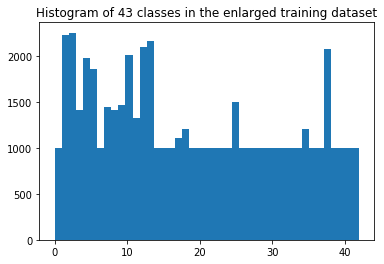

In [10]:
plt.hist(y_train, bins=43)
plt.title("Histogram of 43 classes in the enlarged training dataset")

In [11]:
### Create the Validation Set - 20% of the training set
from sklearn.cross_validation import train_test_split

X_train, X_validation, y_train, y_validation = train_test_split(X_train_pro, y_train, test_size=0.2, random_state=42)

print('Size of X_train = ', X_train.shape)
print('Size of X_valid = ', X_validation.shape)
print('Size of y_train = ', y_train.shape)
print('Size of y_valid = ', y_validation.shape)

Size of X_train =  (43768, 32, 32, 1)
Size of X_valid =  (10942, 32, 32, 1)
Size of y_train =  (43768,)
Size of y_valid =  (10942,)


/home/carnd/anaconda3/envs/carnd-term1/lib/python3.5/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


### Question 2

_Describe how you set up the training, validation and testing data for your model. **Optional**: If you generated additional data, how did you generate the data? Why did you generate the data? What are the differences in the new dataset (with generated data) from the original dataset?_

**Answer:**
1. Generating new data  
By checking the histogram of the original training set, I found that some of the classes have relatively a few number of samples. In order to make the model will be trained later be robust to these class, I decide to generate some new samples for these classes. The actual additional data was generated from the already existing pictures in each class, by rotating the figures a random angle between (-15, 15) degree using scipy's 'ndimage.rotate' function. This method was also introduced in original LeNet paper by LeCun. For all the classes has samples less than 1000, I use the loop to generate figures for there classes until the number rise to 1000. This is why the histogram ends up having a ton of classes at the same spot. Comparing to the original training set, now the enlarged training set has 43768 samples. 
2. Training, validation, and testing set  
For the training and validation data, I split the enlarged training set into 80%:20% by using 'train_test_split' command in the 'sklearn'. 80% of the data will be used for training and 20% will be used as the validation set. The 'train_test_split' command will also shuffle all data automatically. The test data is already provided by this project. 

In [12]:
### Define your architecture here.
### Feel free to use as many code cells as needed.

X_train, y_train = shuffle(X_train, y_train)

import tensorflow as tf

EPOCHS = 40
BATCH_SIZE = 128
keep_prob = tf.placeholder(tf.float32)

from tensorflow.contrib.layers import flatten

def LeNet(x):    
    # Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
    mu = 0
    sigma = 0.1
    
    # TODO: Layer 1: Convolutional. Input = 32x32x1. Output = 28x28x20.
    conv1_w = tf.Variable(tf.truncated_normal(shape = (5,5,1,20), mean = mu, stddev = sigma))
    conv1_b = tf.Variable(tf.zeros(20))
    conv1 = tf.nn.bias_add(tf.nn.conv2d(x, conv1_w, strides = [1,1,1,1], padding = 'VALID'), conv1_b)
    # TODO: Activation.
    conv1 = tf.nn.relu(conv1)

    # TODO: Pooling. Input = 28x28x20. Output = 14x14x20.
    conv1 = tf.nn.max_pool(conv1, ksize = [1,2,2,1], strides = [1,2,2,1], padding='VALID')
    
    # add a internal layer 1.5 between layer 1 and layer 2
    # Convolutional. Input 14x14x20 Output = 12x12x40
    conv15_w = tf.Variable(tf.truncated_normal(shape = (3,3,20,40), mean = mu, stddev = sigma))
    conv15_b = tf.Variable(tf.zeros(40))
    conv15 = tf.nn.bias_add(tf.nn.conv2d(conv1, conv15_w, strides = [1,1,1,1], padding = 'VALID'), conv15_b)
    # TODO: Activation.
    conv15 = tf.nn.relu(conv15)
    
    conv15 = tf.nn.dropout(conv15, keep_prob)

    # TODO: Layer 2: Convolutional. Input = 12x12x40. Output = 10x10x80.
    conv2_w = tf.Variable(tf.truncated_normal(shape = (3,3,40,80), mean = mu, stddev = sigma))
    conv2_b = tf.Variable(tf.zeros(80))
    conv2 = tf.nn.bias_add(tf.nn.conv2d(conv15, conv2_w, strides=[1,1,1,1], padding = 'VALID'), conv2_b)
    
    # TODO: Activation.
    conv2 = tf.nn.relu(conv2)

    # TODO: Pooling. Input = 10x10x80. Output = 5x5x80.
    conv2 = tf.nn.max_pool(conv2, ksize = [1,2,2,1], strides = [1,2,2,1], padding='VALID')
    
    # TODO: Flatten. Input = 5x5x80. Output = 2000.
    fc0 = flatten(conv2)
    # TODO: Layer 3: Fully Connected. Input = 2000. Output = 120.
    fc1_w = tf.Variable(tf.truncated_normal(shape = (2000, 120), mean = mu, stddev = sigma))
    fc1_b = tf.Variable(tf.zeros(120))
    fc1 = tf.nn.bias_add(tf.matmul(fc0, fc1_w), fc1_b)
    # TODO: Activation.
    fc1 = tf.nn.relu(fc1)
    
    # TODO: Layer 4: Fully Connected. Input = 120. Output = 84.
    fc2_w = tf.Variable(tf.truncated_normal(shape = (120, 84), mean = mu, stddev = sigma))
    fc2_b = tf.Variable(tf.zeros(84))
    fc2 = tf.nn.bias_add(tf.matmul(fc1, fc2_w), fc2_b)
    # TODO: Activation.
    fc2 = tf.nn.relu(fc2)

    # TODO: Layer 5: Fully Connected. Input = 84. Output = 43.
    fc3_w = tf.Variable(tf.truncated_normal(shape = (84, 43), mean = mu, stddev = sigma))
    fc3_b = tf.Variable(tf.zeros(43))
    logits = tf.nn.bias_add(tf.matmul(fc2, fc3_w), fc3_b)
    
    return logits


In [13]:
x = tf.placeholder(tf.float32, (None, 32, 32, 1))
y = tf.placeholder(tf.int32, (None))
one_hot_y = tf.one_hot(y, 43)

In [14]:
rate = 0.001

logits = LeNet(x)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits, one_hot_y)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

In [15]:
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y, keep_prob: 1.0})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

### Question 3

_What does your final architecture look like? (Type of model, layers, sizes, connectivity, etc.)  For reference on how to build a deep neural network using TensorFlow, see [Deep Neural Network in TensorFlow
](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/b516a270-8600-4f93-a0a3-20dfeabe5da6/concepts/83a3a2a2-a9bd-4b7b-95b0-eb924ab14432) from the classroom._


**Answer:**  
Based on the structure of LeNet introduced in the lecture, I design the network for the traffic sign classification. 
The classic LeNet is designed for the 10 handwriting digits classification, where the output is one of the 10 classes. However, here we have 43 different classes. Therefore, I think we may need more layer or deeper convolution depth. 
The final architecture has 3 convolution layer and 3 fully connected layers, which is show as follows:

Because of  we change all the figures to gray-scale, so the input shape going into the first convolutional layer is 32x32x1.

**Convolution layer 1**. The output shape should be 28x28x20.

**Activation 1**. Relu (Rectified Linear Units).

**Pooling layer 1**. The output shape should be 14x14x20.


**Convolution layer 2**. The output shape should be 12x12x40.

**Activation 2**. Relu (Rectified Linear Units).

**Dropout layer 2**. Keep Probability 0.7.


**Convolution layer 3**. The output shape should be 10x10x80.

**Activation 3**. Relu (Rectified Linear Units)

**Pooling layer 3**. The output shape should be 5x5x80.


**Flatten layer**. Flatten the output shape of the final pooling layer such that it's 1D instead of 3D. It changes the input in size 5x5x80 to 2000. 

**Fully connected layer 1**. This should have 120 outputs.

**Activation 4**. Relu (Rectified Linear Units)

**Fully connected layer 2**. This should have 84 outputs.

**Activation 5**. Relu (Rectified Linear Units)

**Fully connected layer 3**. This should have 43 outputs.




In [23]:
### Train your model here.
### Feel free to use as many code cells as needed.

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)
    
    print("Training...")
    print()
    for i in range(EPOCHS):
        X_train, y_train = shuffle(X_train, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y, keep_prob: 0.7})
            
        validation_accuracy = evaluate(X_validation, y_validation)
        print("EPOCH {} ...".format(i+1))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print()
        
    saver.save(sess, 'traffic_sign_net')
    print("Model saved")

Training...

EPOCH 1 ...
Validation Accuracy = 0.892

EPOCH 2 ...
Validation Accuracy = 0.957

EPOCH 3 ...
Validation Accuracy = 0.973

EPOCH 4 ...
Validation Accuracy = 0.980

EPOCH 5 ...
Validation Accuracy = 0.983

EPOCH 6 ...
Validation Accuracy = 0.983

EPOCH 7 ...
Validation Accuracy = 0.988

EPOCH 8 ...
Validation Accuracy = 0.988

EPOCH 9 ...
Validation Accuracy = 0.991

EPOCH 10 ...
Validation Accuracy = 0.988

EPOCH 11 ...
Validation Accuracy = 0.993

EPOCH 12 ...
Validation Accuracy = 0.993

EPOCH 13 ...
Validation Accuracy = 0.991

EPOCH 14 ...
Validation Accuracy = 0.992

EPOCH 15 ...
Validation Accuracy = 0.991

EPOCH 16 ...
Validation Accuracy = 0.994

EPOCH 17 ...
Validation Accuracy = 0.993

EPOCH 18 ...
Validation Accuracy = 0.994

EPOCH 19 ...
Validation Accuracy = 0.990

EPOCH 20 ...
Validation Accuracy = 0.991

EPOCH 21 ...
Validation Accuracy = 0.995

EPOCH 22 ...
Validation Accuracy = 0.993

EPOCH 23 ...
Validation Accuracy = 0.991

EPOCH 24 ...
Validation Accura

In [16]:
import tensorflow as tf
saver = tf.train.Saver()
with tf.Session() as sess:
    #saver.restore(sess, tf.train.latest_checkpoint('.'))
    saver.restore(sess, './traffic_sign_net')
    test_accuracy = evaluate(X_test_pro, y_test)
    print("Test Accuracy = {:.3f}".format(test_accuracy))

Test Accuracy = 0.962


### Question 4

_How did you train your model? (Type of optimizer, batch size, epochs, hyperparameters, etc.)_


**Answer:**

1. Optimizer: AdamOptimizer from within TensorFLow to optimize, which I think is better than a regular Gradient Descent Optimizer. 
2. The batch size I am using the default one provided in the lecture: 128. 
3. I ran totol 40 epochs. I first set it to be 10, but I found that is not enough. Even after the 20th epoch, the validation accuracy is still increasing. 
4. For the hyperparameters, I use a mean of 0 and standard deviation/sigma of 0.1. I tried a few other standard deviations but found a smaller one did not really help. 


### Question 5


_What approach did you take in coming up with a solution to this problem? It may have been a process of trial and error, in which case, outline the steps you took to get to the final solution and why you chose those steps. Perhaps your solution involved an already well known implementation or architecture. In this case, discuss why you think this is suitable for the current problem._

**Answer:**
1. I first tried to use the classic LetNet(2 convolution layers and 3 fully connected layers) for this traffic sign classification. It somehow gives a good performance. After 10 epoches, the validation accuracy is about 0.972. Based on this, I add an additional convolution layer between Layer 1 and Layer 2, but I do not change the depth of the convolution of the orignial LeNet. Now the new net has 3 convolution layers and 3 fully connected layers. After 10 epoches of training, the validation accuracy is about 0.983, which means that deeper network will help. Later, I stick with this 3 convolution layers and 3 fully connected layers network. I further increase the depth of each convolution layer, that means the output of each layer now has more depths. The I found that after 10 epoches, the validation accuracy is about 0.991. I think this model is the desired one.  
2. After I determine the architecture, I increase the number of epoches from 10 to 40, which helps to increase the validation accuracy, but not too much.  
3. I also change the batch size to some other values other than 128 but it does not help much.  

The current model is suitable for the current problem with 43 classes. It has deeper network and deeper convolution than the LeNet for 10-class classification.




---

## Step 3: Test a Model on New Images

Take several pictures of traffic signs that you find on the web or around you (at least five), and run them through your classifier on your computer to produce example results. The classifier might not recognize some local signs but it could prove interesting nonetheless.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

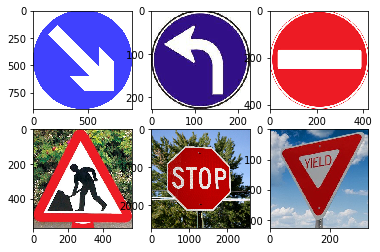

In [34]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
%matplotlib inline

image1=mpimg.imread('real_test/keep_right.jpg')
plt.subplot(2,3,1)
#plt.axis('off')
plt.imshow(image1)

image2=mpimg.imread('real_test/left_turn.jpg')
plt.subplot(2,3,2)
#plt.axis('off')
plt.imshow(image2)

image3=mpimg.imread('real_test/no_entry.jpg')
plt.subplot(2,3,3)
#plt.axis('off')
plt.imshow(image3)

image4=mpimg.imread('real_test/road_work.jpg')
plt.subplot(2,3,4)
#plt.axis('off')
plt.imshow(image4)

image5=mpimg.imread('real_test/stop_sign.jpg')
plt.subplot(2,3,5)
#plt.axis('off')
plt.imshow(image5)

image6=mpimg.imread('real_test/yield.jpg')
plt.subplot(2,3,6)
#plt.axis('off')
plt.imshow(image6)

true_label=[38,34,17,25,14,13]

image1 = cv2.resize(image1, (32, 32))
image2= cv2.resize(image2 ,(32, 32))
image3= cv2.resize(image3,(32, 32))
image4=cv2.resize(image4,(32, 32))
image5=cv2.resize(image5,(32, 32))
image6=cv2.resize(image6,(32, 32))


### Question 6

_Choose five candidate images of traffic signs and provide them in the report. Are there any particular qualities of the image(s) that might make classification difficult? It could be helpful to plot the images in the notebook._



**Answer:**
I download 6 traffic sign figures from the internet, which are  
1. 'Keep wight': class label 38  
2. 'Turn left ahead': class label 34  
3. 'No entry': class label 17  
4. 'Road work': class label 25  
5. 'Stop': class label 14  
6. 'Yield': class label 13  

From the plotted figures shown above, we can find that the first three figures are standard original pictures of the sign. The last three figures are the photos taken be people. The backgrounds such as the trees, sky, and the road might make classification difficult.


In [19]:
### Run the predictions here.
### Feel free to use as many code cells as needed.

# Make into numpy array for processing
test_figs_data = np.array([image1,image2,image3,image4,image5,image6])

# First, double-check the image shape to make sure it matches the original data's 32x32x3 size
print(test_figs_data.shape)

(6, 32, 32, 3)


In [20]:
print('Preprocessing additional pictures...')

# Iterate through grayscale
test_figs_data = preprocess(test_figs_data)
test_figs_data = test_figs_data[..., newaxis]

# Normalize
test_figs_data = normalize_grayscale(test_figs_data) 

print('Finished preprocessing additional pictures.')

# Double-check that the image is changed to depth of 1
new_image_shape = test_figs_data.shape
print("Processed additional pictures shape =", new_image_shape)

Preprocessing additional pictures...
Finished preprocessing additional pictures.
Processed additional pictures shape = (6, 32, 32, 1)


In [37]:
# Run rhw predictions
prediction = tf.nn.softmax(logits)
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    new_figs_class = sess.run(prediction, feed_dict={x: test_figs_data, keep_prob : 1.0})
    
for i in range(len(predicts[0])):
    predict_label = np.argmax(new_figs_class[i])
    print('Image', i, 'prediction:',  predict_label, ', the true label is', true_label[i],'.')



Image 0 prediction: 38 , the true label is 38 .
Image 1 prediction: 34 , the true label is 34 .
Image 2 prediction: 17 , the true label is 17 .
Image 3 prediction: 1 , the true label is 25 .
Image 4 prediction: 14 , the true label is 14 .
Image 5 prediction: 13 , the true label is 13 .


### Question 7

_Is your model able to perform equally well on captured pictures when compared to testing on the dataset? The simplest way to do this check the accuracy of the predictions. For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate._

_**NOTE:** You could check the accuracy manually by using `signnames.csv` (same directory). This file has a mapping from the class id (0-42) to the corresponding sign name. So, you could take the class id the model outputs, lookup the name in `signnames.csv` and see if it matches the sign from the image._


**Answer:**

I found that the prediction of my model is pretty good. It predicts 5 signs correct(the one with highest certainty) out of 6. The accuracy is 5/6 = 83.3%.  

However, the prediction of the fouth one "road work" is incorrect. It predicts it as "Speed limit 30".  

More detailed discussion is shown Question 8. 


In [38]:
### Visualize the softmax probabilities here.
### Feel free to use as many code cells as needed.

with tf.Session() as sess:
    predicts = sess.run(tf.nn.top_k(new_figs_class, k=5, sorted=True))
    

#with tf.Session() as sess:
#    saver.restore(sess, 'traffic_sign_net')

#print(predicts)

for i in range(len(predicts[0])):
    print('Image', i, 'probabilities:', predicts[0][i], 'and predicted classes:', predicts[1][i])


Image 0 probabilities: [  1.00000000e+00   2.19690488e-09   8.01231650e-12   1.17697557e-16
   4.98427232e-18] and predicted classes: [38  5 23 29 25]
Image 1 probabilities: [  1.00000000e+00   4.61197036e-09   3.35756867e-09   1.33569122e-09
   9.59518159e-11] and predicted classes: [34  2 12 38  5]
Image 2 probabilities: [  1.00000000e+00   1.76509509e-08   5.39624248e-12   1.56154310e-12
   1.15209513e-12] and predicted classes: [17 14 33 38 20]
Image 3 probabilities: [  8.34421158e-01   1.65558994e-01   1.81343985e-05   1.39064127e-06
   1.71311612e-07] and predicted classes: [ 1 40 11 18 26]
Image 4 probabilities: [  9.99994040e-01   5.70487509e-06   1.74606143e-07   6.29520258e-08
   1.87793034e-08] and predicted classes: [14 22 34 18 17]
Image 5 probabilities: [  1.00000000e+00   3.73019541e-13   6.39669931e-14   1.90017747e-14
   1.82843814e-15] and predicted classes: [13 38 36 34 28]


### Question 8

*Use the model's softmax probabilities to visualize the **certainty** of its predictions, [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. Which predictions is the model certain of? Uncertain? If the model was incorrect in its initial prediction, does the correct prediction appear in the top k? (k should be 5 at most)*

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

**Answer:**
For the corrected predictions(Figure 1,2,3,5,and 6), the certainty is very high and close to 1.0, that means the model does a very good job. 

However, for the incorrect one(Figure 4: 'road work'), the correct class is not even shown up in the top 5 highest certainties. The model predicts it as  

"speed limit 30" (8.34421158e-01),  

"Roundabout mandatory" (1.65558994e-01 ),  

"Right-of-way at the next intersection" (1.81343985e-05),  

"General caution" (1.39064127e-06)  

"Traffic signals" (1.71311612e-07)  

with top 5 highest certainties. Some of the incorrect predictions has the same trangle shape with the "road work". That's why it may make mistake. Also, since the "road work" has a sophisticated human-shape in the middle, it also increases the difficulty of classifying. For improving the prediction I suggest to collect samples with a higher resolution and build the network that can accept larger size of images.

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.